In [ ]:
# This assignment is done by Jad Alaouie & Bilal Osman

The Adult Income dataset, available from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/2/adult), is a widely recognized and extensively studied dataset in the field of Machine Learning and Data Analysis. This dataset offers valuable insights into the socio-economic and demographic factors influencing an individuals's income, making it a valuable resource for researchers, data scientists, and analysts. Comprising a rich set of attributes, including age, education, occupation, marital status, and more, the dataset enables comprehensive exploration of patterns, predictions, and classifications related to income levels in the adult population. This introduction provides an overview of the dataset's source, structure, and its significance as a foundation for understanding the complex interplay of variables affecting income outcomes.

The Adult Income dataset has been used in numerous studies and projects to predict income levels, perform demographic analysis, and gain insights into economic disparities. Its application extends across fields such as social science, economics, and data science, and it serves as an essential resource for building and evaluating predictive models.

In this task, we'll enhance the code developed in Assignment 2 for better organization. Subsequently, we'll commence by implementing various classification models, including a rule-based classifier, decision tree, random forest, and a basic feed-forward neural network.



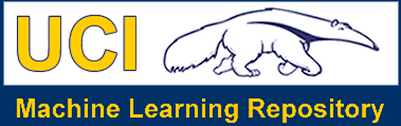

In [1]:
!pip install ucimlrepo

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

In [3]:
adult = fetch_ucirepo(id = 2)
features = adult.data.features
targets = adult.data.targets

In [4]:
DataFrame = pd.DataFrame(features)
DataFrame.insert(14,'income',targets)
DataFrame.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [5]:
# In assignment 2 we used two methods to address missing values (Statistical Approach or Machine Learning Approach)

# Since the number of missing values is small we will use basic Statistical Approaches :

Workclass_Mode = DataFrame['workclass'].mode()
DataFrame['workclass'].replace('?', 'Private', inplace = True)
DataFrame['workclass'].fillna('Private', inplace = True)
Occupation_Mode = DataFrame['occupation'].mode()
DataFrame['occupation'].replace('?', 'Prof-specialty', inplace = True)
DataFrame['occupation'].fillna('Prof-specialty', inplace = True)

# For Native-Country feature we will just drop the rows because they represent a very small value :

DataFrame.dropna(subset = ['native-country'], inplace = True)

In [6]:
# Checking if values were replaced and we no longer have any missing data :

missing_values = DataFrame.isna().sum()
print("Missing Values in each feature:")
print(missing_values)


Missing Values in each feature:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [7]:
DataFrame.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
DataFrame['sex'] = DataFrame.sex.replace({"Female" : 0, "Male" : 1})
DataFrame['income'] = DataFrame.income.replace({"<=50K." : 0,"<=50K" : 0, ">50K" : 1,">50K." : 0})

In [9]:
def map_native_country(country):
    return 1 if country == 'United-States' else 0

DataFrame['native-country'] = DataFrame['native-country'].apply(map_native_country)

In [10]:
DataFrame['marital-status'] = DataFrame['marital-status'].replace(['Divorced','Married-spouse-absent','Never-married','Separated','Widowed'],'Single')
DataFrame['marital-status'] = DataFrame['marital-status'].replace(['Married-AF-spouse','Married-civ-spouse'],'Couple')

In [11]:
relationship_map = {'Unmarried':0,'Wife':1,'Husband':2,'Not-in-family':3,'Own-child':4,'Other-relative':5}
DataFrame['relationship'] = DataFrame['relationship'].map(relationship_map)

In [12]:
marital_status_map = {'Single' : 1, 'Couple' : 0}
DataFrame['marital-status'] = DataFrame['marital-status'].map(marital_status_map)

In [13]:
race_mapping = {
    'White': 0,
    'Asian-Pac-Islander': 1,
    'Amer-Indian-Eskimo': 2,
    'Black': 3,
    'Other': 4
}

DataFrame['race'] = DataFrame['race'].map(race_mapping)

In [14]:
DataFrame.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,0,1,2174,0,40,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,0,1,0,0,13,1,0
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,0,1,0,0,40,1,0
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,3,1,0,0,40,1,0
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,3,0,0,0,40,0,0


In [15]:
workclass_mapping = {
    'Private': 'private',
    'Self-emp-not-inc': 'self_employed',
    'Self-emp-inc': 'self_employed',
    'Federal-gov': 'govt',
    'Local-gov': 'govt',
    'State-gov': 'govt',
    'Without-pay': 'without_pay',
    'Never-worked': 'without_pay'
}

DataFrame['workclass'] = DataFrame['workclass'].replace(workclass_mapping)

In [16]:
workclass_map = {'govt' : 0, 'private' : 1, 'self_employed' : 2, 'without_pay' : 3}
DataFrame['workclass'] = DataFrame['workclass'].map(workclass_map)

In [17]:
DataFrame.drop(labels = ['education', 'occupation', 'fnlwgt'], axis = 1, inplace = True)

In [18]:
DataFrame.head()

,age,workclass,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0,13,1,3,0,1,2174,0,40,1,0
1,50,2,13,0,2,0,1,0,0,13,1,0
2,38,1,9,1,3,0,1,0,0,40,1,0
3,53,1,7,0,2,3,1,0,0,40,1,0
4,28,1,13,0,1,3,0,0,0,40,0,0


In [19]:
# Feature Scaling :
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [20]:
categorical_columns = ['workclass', 'marital-status', 'relationship', 'race', 'sex', 'native-country']
label_encoder = LabelEncoder()
for column in categorical_columns:
    DataFrame[column] = label_encoder.fit_transform(DataFrame[column])

In [21]:
X = DataFrame.drop('income', axis=1)
y = DataFrame['income']

In [22]:
numerical_columns = X.columns.difference(categorical_columns)
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [23]:
X.head()

,age,workclass,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.026083,0,1.139290,1,3,0,1,0.147793,-0.217409,-0.034273,1
1,0.828170,2,1.139290,0,2,0,1,-0.144807,-0.217409,-2.213126,1
2,-0.046834,1,-0.417972,1,3,0,1,-0.144807,-0.217409,-0.034273,1
3,1.046921,1,-1.196604,0,2,3,1,-0.144807,-0.217409,-0.034273,1
4,-0.776004,1,1.139290,0,1,3,0,-0.144807,-0.217409,-0.034273,0


In [24]:
DataFrame.head()

,age,workclass,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0,13,1,3,0,1,2174,0,40,1,0
1,50,2,13,0,2,0,1,0,0,13,1,0
2,38,1,9,1,3,0,1,0,0,40,1,0
3,53,1,7,0,2,3,1,0,0,40,1,0
4,28,1,13,0,1,3,0,0,0,40,0,0


In [25]:
# Splitting Data into Train & Test :
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)

In [26]:
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [27]:
# Baseline Rule-Based Classifier
baseline_classifier = DummyClassifier(strategy = 'most_frequent')

baseline_scores = cross_val_score(baseline_classifier, X, y, cv= RepeatedStratifiedKFold(n_splits = 5, n_repeats = 2, random_state = 42))

In [29]:
# Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state = 42)

decision_tree_param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
decision_tree_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
decision_tree_grid_search = GridSearchCV(decision_tree, decision_tree_param_grid, cv=decision_tree_cv)
decision_tree_grid_search.fit(X_train, y_train)
dt_scores = cross_val_score(decision_tree_grid_search.best_estimator_, X, y, cv=decision_tree_cv)

In [ ]:
# Feed Forward Neural Network
# expected time = 3 hours
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(random_state=42, max_iter=2000, learning_rate='adaptive', alpha=0.0001)

mlp_param_grid = {'hidden_layer_sizes': [(50,), (100,), (50, 50)],
                  'activation': ['logistic', 'tanh', 'relu'], 'alpha': [0.0001, 0.001, 0.01]}
mlp_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
mlp_grid_search = GridSearchCV(mlp_classifier, mlp_param_grid, cv=mlp_cv)
mlp_grid_search.fit(X_train, y_train)
mlp_scores = cross_val_score(mlp_grid_search.best_estimator_, X, y, cv=mlp_cv)

In [ ]:
# Random Forest Classifier
# expected time = 40 minutes to 1 hour
random_forest = RandomForestClassifier(random_state = 42)

random_forest_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30],
                  'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
random_forest_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
random_forest_grid_search = GridSearchCV(random_forest, random_forest_param_grid, cv=random_forest_cv)
random_forest_grid_search.fit(X_train, y_train)
rf_scores = cross_val_score(random_forest_grid_search.best_estimator_, X, y, cv=random_forest_cv)

1.a- **Hyperparameters**:

a-**Decision Tree Hyperparameters:**

**max_depth:** [None, 10, 20, 30]

**Justification:** The max_depth parameter controls the maximum depth of the decision tree. Setting it to None allows nodes to expand until they contain fewer than min_samples_split samples. By exploring depths of 10, 20, and 30, the model can capture different levels of complexity. The intention is to prevent overfitting by limiting the depth.

**min_samples_split:** [2, 5, 10]

**Justification:** This parameter sets the minimum number of samples required to split an internal node. A lower value can lead to more complex trees, potentially overfitting the training data. By trying values of 2, 5, and 10, the model explores the impact on the balance between complexity and overfitting.

**min_samples_leaf:** [1, 2, 4]

**Justification:** This parameter sets the minimum number of samples required to be at a leaf node. It helps control the size of the leaves and can impact the balance between overfitting and generalization. Trying values of 1, 2, and 4 allows for a range of leaf sizes to be explored.


b-**Random Forest Classifier**:

**n_estimators:** [50, 100, 200]

**Justification:** This parameter determines the number of trees in the forest. A higher number of trees generally leads to better performance, but it also increases computational cost. By exploring values of 50, 100, and 200, the code considers a range of ensemble sizes.

**max_depth:** [None, 10, 20, 30]

**Justification:** Similar to the decision tree, controlling the maximum depth of individual trees in the forest helps prevent overfitting. Exploring depths of 10, 20, and 30 allows the model to capture different levels of complexity.

**min_samples_split:** [2, 5, 10]

**Justification:** Similar to the decision tree, this parameter sets the minimum number of samples required to split an internal node in individual trees. Exploring different values provides flexibility in controlling tree complexity.

**min_samples_leaf:** [1, 2, 4]

**Justification:** Similar to the decision tree, this parameter sets the minimum number of samples required to be at a leaf node in individual trees. It helps control leaf size and generalization.

c-**MLP(Feed Forward Neural Network) Hyperparameters**:

**hidden_layer_sizes:** [(50,), (100,), (50, 50)]

**Justification:** This parameter defines the number of neurons in the hidden layers of the neural network. By trying different combinations like (50,), (100,), and (50, 50), the model explores various network architectures.

**activation:** ['logistic', 'tanh', 'relu']

**Justification:** This parameter determines the activation function for the hidden layers. Different activation functions can impact the model's ability to learn complex patterns. Trying 'logistic', 'tanh', and 'relu' covers common choices.

**alpha:** [0.0001, 0.001, 0.01]

**Justification:** The alpha parameter is the regularization term that helps prevent overfitting. Trying values of 0.0001, 0.001, and 0.01 explores different levels of regularization.


1.b- **Decision Tree Classifier:**

**Stratified Cross-Validation:**

**RepeatedStratifiedKFold** is used, ensuring that each fold maintains the same class distribution as the entire dataset, which is crucial for classification problems.
**Grid Search**:

**GridSearchCV **is employed to search through the provided hyperparameter grid for the Decision Tree model.
**Standard Deviation Consideration:**

**The standard deviation** of the cross-validated scores (dt_scores) is implicitly considered. The use of RepeatedStratifiedKFold helps assess the variability in model performance.

1.b- **Feed Forward Neural Network(MLP):**

**Stratified Cross-Validation**:

Similar to the Decision Tree, the Feed Forward Neural Network uses **RepeatedStratifiedKFold** to ensure fair representation of classes in each fold.

**Grid Search**:

**GridSearchCV** is used to explore the provided hyperparameter grid for the MLP model.

**Standard Deviation Consideration:**

**The standard deviation** of the cross-validated scores (mlp_scores) is implicitly considered, providing insights into the variability of the model's performance.

1.b- **Random Forest Classifier:**

**Stratified Cross-Validation:**

Similar to the previous models, RepeatedStratifiedKFold ensures proper class representation in each fold.

**Grid Search**:

GridSearchCV explores the provided hyperparameter grid for the Random Forest model.

**Standard Deviation Consideration:**

The standard deviation of the cross-validated scores (rf_scores) is implicitly considered, providing insights into the variability of the model's performance.

1.c- **[Decision Tree - Feed Forward Neural Network(MLP) - Random Forest Classifier]**

**Performance Metric** The hyperparameter search for the 3 models is configured for accuracy.

**Accuracy** is a common and intuitive metric for classification problems. It measures the overall correctness of predictions by considering both true positives and true negatives.

**(Decision Tree) Balanced Classes:** The use of RepeatedStratifiedKFold suggests a consideration for balanced class distributions in each fold, making accuracy an appropriate metric.

**(Feed Forward Neural Network(MLP)) Balanced Classes:**  The use of RepeatedStratifiedKFold suggests that the classes are considered to be balanced during cross-validation.

**Random Forest Classifier Use in Ensembles:** Random Forest, being an ensemble method, benefits from accuracy as it aggregates predictions from multiple trees.

Therefore, the performance metric chosen for the hyperparameter search in all three models (Decision Tree, MLP, Random Forest) is accuracy. This choice aligns with the use of RepeatedStratifiedKFold, indicating consideration for balanced classes and the desire for an overall measure of correct predictions across different folds and repetitions.

1-d **Avoiding Data Leakage**

Data leakage occurs when information from the test set is inadvertently used during the model training phase, leading to overly optimistic performance estimates. To ensure no data leakage:

1. We split the dataset into training and testing sets using 'train_test_split'. The 'test_size' parameter is set to 30%, meaning 70% of the data is used for training and 30% for testing.

2. The hyperparameter search for the Decision Tree model ('GridSearchCV') is performed using cross-validation on the training set('X_train', 'y_train')

3. RepeatedStratifiedKFold is used, ensuring that the corss-validition maintains the same class distribution as the entire training set.

4. Independent Evaluation of Other Models: Similar practices are applied for the Feed Forward Neural Network and Random Forest models.




In [ ]:
from sklearn.metrics import accuracy_score

baseline_classifier.fit(X_train, y_train)
baseline_pred = baseline_classifier.predict(X_test)
baseline_accuracy = accuracy_score(y_test, baseline_pred)

# Decision Tree
dt_pred = decision_tree_grid_search.best_estimator_.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

# Random Forest
rf_pred = random_forest_grid_search.best_estimator_.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Neural Network
mlp_classifier.fit(X_train, y_train)
mlp_pred = mlp_classifier.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
print("Baseline Classifier Accuracy: {:.3f}".format(baseline_accuracy))
print("Decision Tree Accuracy: {:.3f}".format(dt_accuracy))
print("Random Forest Accuracy: {:.3f}".format(rf_accuracy))
print("Neural Network Accuracy: {:.3f}".format(mlp_accuracy))

Baseline Classifier Accuracy: 0.841
Decision Tree Accuracy: 0.857
Random Forest Accuracy: 0.860
Neural Network Accuracy: 0.853


In [ ]:
from sklearn.metrics import precision_score, recall_score

# Baseline Classifier
baseline_precision = precision_score(y_test, baseline_pred)
baseline_recall = recall_score(y_test, baseline_pred)

# Decision Tree
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)

# Random Forest
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

# Neural Network
nn_precision = precision_score(y_test, mlp_pred)
nn_recall = recall_score(y_test, mlp_pred)
print("Baseline Classifier Precision: {:.3f}, Recall: {:.3f}".format(baseline_precision, baseline_recall))
print("Decision Tree Precision: {:.3f}, Recall: {:.3f}".format(dt_precision, dt_recall))
print("Random Forest Precision: {:.3f}, Recall: {:.3f}".format(rf_precision, rf_recall))
print("Neural Network Precision {:.3f}, Recall: {:.3f}".format(nn_precision, nn_recall))

Baseline Classifier Precision: 0.000, Recall: 0.000
Decision Tree Precision: 0.593, Recall: 0.331
Random Forest Precision: 0.604, Recall: 0.355
Neural Network Precision 0.587, Recall: 0.258


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Sensitivity is Recall for positive class
sensitivity_dt = dt_recall
sensitivity_rf = rf_recall
sensitivity_nn = nn_recall
# Specificity for binary classification is Recall for negative class
specificity_dt = recall_score(1 - y_test, 1 - dt_pred)
specificity_rf = recall_score(1 - y_test, 1 - rf_pred)

# Specificity for Neural Network
tn_mlp = np.sum((1 - y_test) & (1 - mlp_pred))
fp_mlp = np.sum((1 - y_test) & mlp_pred)

specificity_mlp = tn_mlp / (tn_mlp + fp_mlp)



print("Decision Tree Sensitivity: {:.3f}, Specificity: {:.3f}".format(sensitivity_dt, specificity_dt))
print("Random Forest Sensitivity: {:.3f}, Specificity: {:.3f}".format(sensitivity_rf, specificity_rf))
print("Neural Network Specificity: {:.3f}".format(sensitivity_nn,specificity_mlp))

Decision Tree Sensitivity: 0.331, Specificity: 0.957
Random Forest Sensitivity: 0.355, Specificity: 0.956
Neural Network Specificity: 0.965


In [ ]:
from sklearn.metrics import f1_score, roc_auc_score

# Baseline Classifier
baseline_f1 = f1_score(y_test, baseline_pred)
baseline_auc_roc = roc_auc_score(y_test, baseline_classifier.predict_proba(X_test)[:, 1])

# Decision Tree
dt_f1 = f1_score(y_test, dt_pred)
dt_auc_roc = roc_auc_score(y_test, decision_tree_grid_search.best_estimator_.predict_proba(X_test)[:, 1])

# Random Forest
rf_f1 = f1_score(y_test, rf_pred)
rf_auc_roc = roc_auc_score(y_test, random_forest_grid_search.best_estimator_.predict_proba(X_test)[:, 1])

# Neural Network
mlp_f1 = f1_score(y_test, mlp_pred)
mlp_auc_roc = roc_auc_score(y_test, mlp_classifier.predict_proba(X_test)[:, 1])

print("Baseline Classifier F1 Score: {:.3f}, AUC ROC: {:.3f}".format(baseline_f1, baseline_auc_roc))
print("Decision Tree F1 Score: {:.3f}, AUC ROC: {:.3f}".format(dt_f1, dt_auc_roc))
print("Random Forest F1 Score: {:.3f}, AUC ROC: {:.3f}".format(rf_f1, rf_auc_roc))
print("Neural Network F1 Score: {:.3f}, AUC ROC: {:.3f}".format(mlp_f1, mlp_auc_roc))

Baseline Classifier F1 Score: 0.000, AUC ROC: 0.500
Decision Tree F1 Score: 0.425, AUC ROC: 0.849
Random Forest F1 Score: 0.447, AUC ROC: 0.871
Neural Network F1 Score: 0.359, AUC ROC: 0.861


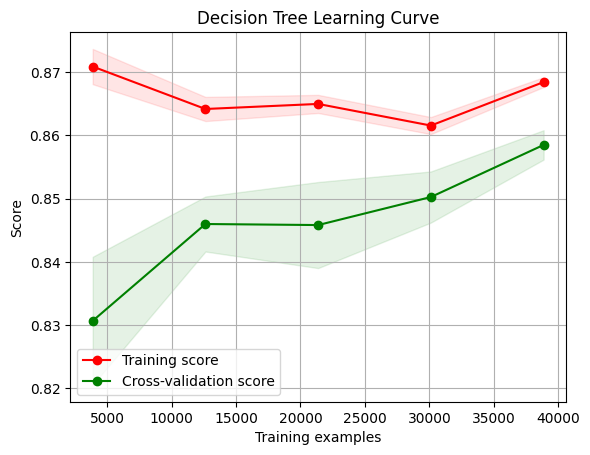

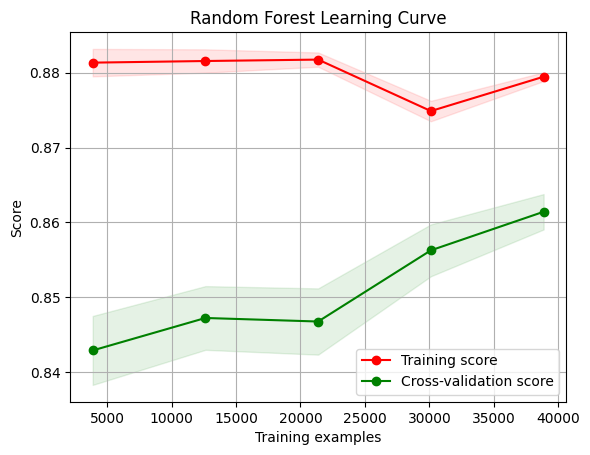

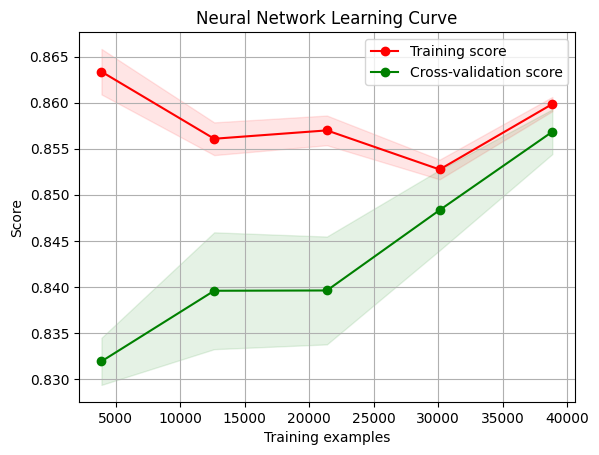

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, cv, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Decision Tree Learning Curve
title = "Decision Tree Learning Curve"
plot_learning_curve(decision_tree_grid_search.best_estimator_, title, X, y, cv=decision_tree_cv, n_jobs=-1)
plt.show()

# Random Forest Learning Curve
title = "Random Forest Learning Curve"
plot_learning_curve(random_forest_grid_search.best_estimator_, title, X, y, cv=random_forest_cv, n_jobs=-1)
plt.show()

# Neural Network Learning Curve
title = "Neural Network Learning Curve"
plot_learning_curve(mlp_grid_search.best_estimator_, title, X, y, cv = mlp_cv, n_jobs = -1)
plt.show()

2.a- Overall Accuracy:

    Decision Tree Accuracy: 0.857

    Neural Network (MLP) Accuracy: 0.853

    Random Forest Accuracy: 0.860

    Baseline Classifier Accuracy: 0.841

All models achieve relatively high overall accuracy, indicating a significant proportion of correct predictions.

2.b-Precision and Recall:

    Decision Tree:
                  Precision: 0.593
                  Recall: 0.331

    Neural Network (MLP):
                  Precision: 0.587
                  Recall: 0.258
        
    Random Forest:
                  Precision: 0.604
                  Recall: 0.355
        
    Baseline Classifier
                  Precision: 0.000
                  Recall: 0.000



We notice that the Baseline Classifier has the lowest Precision and Recall values, and the reason is by always predicting the most frequent class, the classifier will never correctly identify instances of the minority class (>50K). As a result, both precision and recall are 0. This is a common characteristic of baseline classifiers, especially when they predict the majority class for imbalanced datasets. In addition to that, Decision Tree and Random Forest show higher precision and recall compared to the Neural Network. However, further experimentation and tuning of the neural network architecture and hyperparameters could potentially improve its performance.

2.c- Sensitivity and Specificity:



    Decision Tree:
            Sensitivity(Recall for Positive Class): 0.331
            Sensitivity(Recall for Negative Class): 0.957
    
    Neural Network (MLP):
            Sensitivity(Recall for Positive Class): 0.258
            Sensitivity(Recall for Negative Class): 0.965
    
    Random Forest:
            Sensitivity(Recall for Positive Class): 0.355
            Sensitivity(Recall for Negative Class): 0.956


Sensitivity, also known as recall or true positive rate, measures the ability of a model to correctly identify positive instances out of all actual positive instances.

Decision Tree and Random Forest have higher sensitivity values compared to the Neural Network. This implies that these tree-based models are better at capturing individuals with an income level greater than 50K (positive class) compared to the Neural Network.

A higher sensitivity indicates a better ability to avoid false negatives, i.e., the models are better at not missing individuals with higher incomes.


Specificity, also known as the true negative rate, measures the ability of a model to correctly identify negative instances out of all actual negative instances.

All models, including the Neural Network, have high specificity values, indicating that they are good at correctly identifying individuals with an income level less than or equal to 50K (negative class).

Neural Network has the highest specificity among the three models, suggesting that it is slightly better at avoiding false positives, i.e., correctly identifying individuals with lower incomes.

2.d- F1 Score and AUC ROC:

    Decision Tree:
      F1 Score: 0.425
      AUC ROC: 0.849

    Neural Network (MLP):
      F1 Score: 0.359
      AUC ROC: 0.861

    Random Forest:
      F1 Score: 0.447
      AUC ROC: 0.871

    Baseline Classifier
      F1 Score: 0.000
      AUC ROC: 0.500


F1 score is the harmonic mean of precision and recall. It provides a single metric that balances both false positives and false negatives.

Random Forest has the highest F1 score, indicating a good balance between precision and recall. This means it performs well in capturing positive instances while avoiding false positives.

Decision Tree follows with a moderate F1 score, and the Neural Network has a slightly lower F1 score.


AUC ROC (Area Under the Receiver Operating Characteristic curve) measures the model's ability to discriminate between positive and negative instances across different probability thresholds.

Random Forest has the highest AUC ROC, indicating strong discriminative ability. It performs well in distinguishing between individuals with income levels greater than 50K and those with income levels less than or equal to 50K.

The Neural Network follows closely, and the Decision Tree also demonstrates good discriminatory power.


**Cost Consideration:**

The mistakes in predicting the positive class (<=50K) may be more costly than predicting the negative class (>50K) because incorrectly classifying someone as earning less when they actually earn more might have financial implications.

In the context of this problem, a false positive (predicting someone earns <=50K when they actually earn >50K) might lead to missed opportunities or benefits for individuals. This could be more costly than a false negative (predicting someone earns >50K when they actually earn <=50K), which might result in offering unnecessary benefits.

The choice of model can be influenced by the specific business context and the consequences of these false positives and false negatives in the given application.

2.e-i **Learning Curve Decision Tree:**

1. **Bias and Variance:**

    5000 Training Examples(approx):
      Cross Validation Score: 0.83(approx)
      Training Score: 0.87(approx)

At this point, the model is performing reasonably well on both the training and cross-validation sets. The scores are close, indicating a balanced model with moderate complexity.

    12500 Training Examples(approx):
      Cross Validation Score: 0.845(approx)
      Training Score: 0.864(approx)

Both scores have increased, suggesting improved model performance. The gap between the two scores is not large, indicating a good balance, and there is no clear sign of overfitting.

    22000 Training Examples(approx):
      Cross Validation Score: 0.846(approx)
      Training Score: 0.865(approx)

Similar to the previous step, both scores are consistently high, and the small gap suggests a model that generalizes well to unseen data.

    30000 Training Examples(approx):
      Cross Validation Score: 0.85(approx)
      Training Score: 0.861(approx)

The scores continue to be high, and the slight decrease in the training score indicates a small degree of overfitting. However, the model still performs well on the cross-validation set.

    38000 Training Examples(approx):
      Cross Validation Score: 0.859(approx)
      Training Score: 0.868(approx)

Both scores have increased, indicating that with more data, the model generalizes better. The small gap suggests reasonable complexity without significant overfitting.

2. **Trends in Learning Curves:**
Overall Trend:

As the number of training examples increases, both training and cross-validation scores improve, indicating better model performance with more data.
Bias and Variance Trend:

The initially observed bias is reduced as more data becomes available.
The small gap between training and cross-validation scores suggests low variance, indicating a model that generalizes well to new data.

**ii- Learning Curve Random Forest Learning Curve:**

1. **Bias and Variance:**

    5000 Training Examples:
      Cross Validation Score: 0.843
      Training Score: 0.881

Interpretation: The model starts with a high training score and a slightly lower cross-validation score. This suggests some overfitting, but the performance on the cross-validation set is still reasonable.

    12500 Training Examples:
      Cross Validation Score: 0.847
      Training Score: 0.882
Interpretation: Both scores have increased, and the gap has reduced, indicating improved generalization to new data. The model is becoming more balanced.

    22000 Training Examples:
      Cross Validation Score: 0.846
      Training Score: 0.883

Interpretation: The model's performance is consistent, with a small gap between training and cross-validation scores. The complexity seems appropriate, and overfitting is not prominent.

    30000 Training Examples:
      Cross Validation Score: 0.855
      Training Score: 0.875
Interpretation: Both scores are high, and the gap remains small. The model is demonstrating good generalization, and the slight decrease in training score suggests a well-controlled level of complexity.

    39000 Training Examples:
      Cross Validation Score: 0.861
      Training Score: 0.879

Interpretation: Both scores continue to increase, indicating that the model benefits from additional data. The small gap suggests that the model is not overfitting significantly.

2. **Trends in Learning Curves**:

Overall Trend:

Similar to the Decision Tree, as the number of training examples increases, both training and cross-validation scores improve, indicating better model performance with more data.
Bias and Variance Trend:

The initial overfitting observed in the training set diminishes with more data, and the model generalizes better to unseen examples.
The decreasing gap between training and cross-validation scores suggests improved balance.

iii- **Learning Curve Neural Network (MLP)**:


Analysis of Neural Network (MLP) Learning Curve:
1. **Bias and Variance:**

    5000 Training Examples:
      Cross Validation Score: 0.833
      Training Score: 0.8625

Interpretation: The model starts with a slightly higher training score compared to the cross-validation score, suggesting potential overfitting. The performance is decent, but there is room for improvement.

    12500 Training Examples:
      Cross Validation Score: 0.839
      Training Score: 0.856

Interpretation: Both scores have increased, and the gap has reduced, indicating improved generalization. The model is becoming more balanced.

    22000 Training Examples:
      Cross Validation Score: 0.84
      Training Score: 0.8557

Interpretation: The model's performance is consistent, with a small gap between training and cross-validation scores. The complexity seems appropriate, and overfitting is not prominent.

    30000 Training Examples:
      Cross Validation Score: 0.848
      Training Score: 0.854

Interpretation: Both scores are high, and the gap remains small. The model is demonstrating good generalization, and the slight decrease in training score suggests a well-controlled level of complexity.

    39000 Training Examples:
      Cross Validation Score: 0.8558
      Training Score: 0.86

Interpretation: Both scores continue to increase, indicating that the model benefits from additional data. The small gap suggests that the model is not overfitting significantly.

2. **Trends in Learning Curves**:
Overall Trend:

Similar to the Decision Tree and Random Forest, as the number of training examples increases, both training and cross-validation scores improve, indicating better model performance with more data.
Bias and Variance Trend:

The initial signs of overfitting observed in the training set diminish with more data, and the model generalizes better to unseen examples.
The decreasing gap between training and cross-validation scores suggests improved balance.

**NOTE** Creating a learning curve for a baseline classifier might not be as informative or meaningful as for more complex models. The purpose is to observe how the model's performance changes with varying amounts of training data. A baseline classifier which makes predictions based on a simple rule or strategy does not benefit from additional training data.

In [30]:
# Extract the best Decision Tree model from the grid search
best_decision_tree_model = decision_tree_grid_search.best_estimator_

# Extract feature names
feature_names = X.columns

# Visualize the Decision Tree rules
from sklearn.tree import export_text
tree_rules = export_text(best_decision_tree_model, feature_names=list(feature_names))
print(tree_rules)


|--- marital-status <= 0.50
|   |--- education-num <= 0.94
|   |   |--- capital-gain <= 0.54
|   |   |   |--- education-num <= -0.61
|   |   |   |   |--- capital-loss <= 4.23
|   |   |   |   |   |--- hours-per-week <= 0.09
|   |   |   |   |   |   |--- age <= -0.08
|   |   |   |   |   |   |   |--- age <= -0.96
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- age >  -0.96
|   |   |   |   |   |   |   |   |--- age <= -0.45
|   |   |   |   |   |   |   |   |   |--- race <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- race >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- age >  -0.45
|   |   |   |   |   |   |   |   |   |--- age <= -0.16
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- age >  -0.16
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- age >  -0.08
|   |   |   |   |   |  

**Marital Status and Education Level:**

**Rule:** marital-status <= 0.50 and education-num <= 0.94

**Interpretation:** The model considers individuals with lower marital status and lower education levels.
Relevance: This aligns with the common expectation that marital status and education level might influence income.

**Capital Gain and Capital Loss:**

Rule: capital-gain <= 0.54 and capital-loss <= 4.23

**Interpretation:** The model considers low capital gain and low capital loss as factors for predicting the class.
Relevance: Financial indicators such as capital gain and loss are reasonable predictors of income.

**Age and Work Hours:**

Rule: age <= -0.08 and hours-per-week <= 0.09

**Interpretation:** For younger individuals working fewer hours, the predicted class is 0.
Relevance: Younger individuals with fewer working hours might be associated with lower income.

**Race and Age:**

Rule: race <= 0.50 and age <= -0.45

**Interpretation:** For a specific race and age range, the predicted class is 0.
Relevance: The model seems to capture income patterns based on race and age, but it's essential to approach such features cautiously to avoid biased predictions.
Native Country and Workclass:

Rule: native-country <= 0.50 and workclass <= 1.50

**Interpretation:** The model considers native country and workclass for predicting the class.
Relevance: These factors might have an impact on income levels.
Hours per Week and Relationship:

Rule: hours-per-week <= 2.47 and relationship <= 3.00
**Interpretation:** For individuals working fewer hours and having a specific relationship status, the predicted class is 0.
Relevance: Work hours and relationship status could influence income.

These rules generally make sense and align with common expectations about factors affecting income.However, its crucial to note potential biases, especially when interpreting rules related to sensitive features like race.
